In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Heart Disease Prediction\Heart_disease_cleveland_new.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

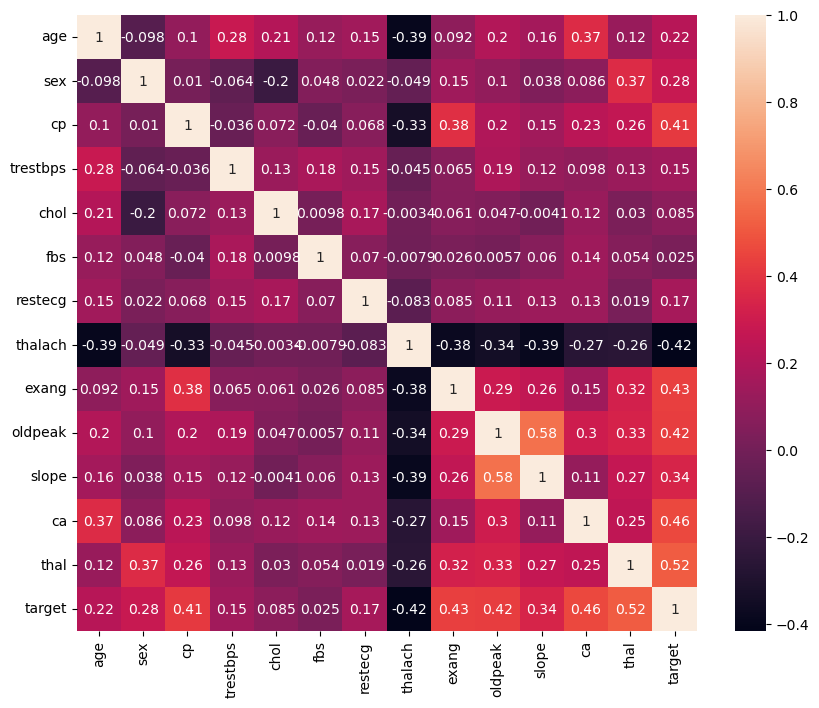

In [139]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Number of patients having heart disease

In [6]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

([<matplotlib.axis.XTick at 0x24bb0e9e5f0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Heart Patients')])

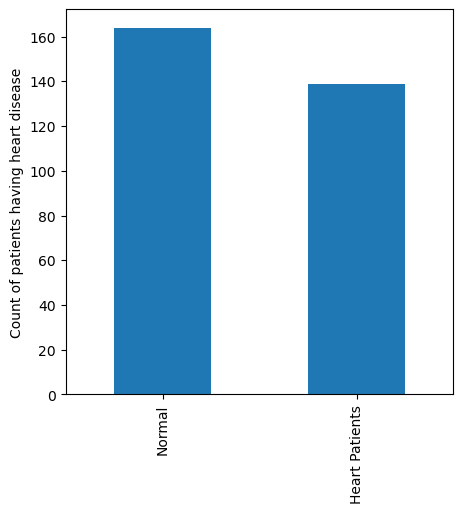

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
y = df['target'].value_counts()
y.plot.bar()
plt.ylabel('Count of patients having heart disease')
x_values = ['Normal', 'Heart Patients']
plt.xticks(range(len(x_values)), x_values)


([<matplotlib.patches.Wedge at 0x24bb174a590>,
 [Text(-1.0907745248405871, -0.1421651713985937, 'Normal'),
  Text(1.0907745381510465, 0.14216506927291103, 'Heart Patients')],
 [Text(-0.5949679226403202, -0.07754463894468745, '54%'),
  Text(0.5949679299005707, 0.07754458323976963, '46%')])

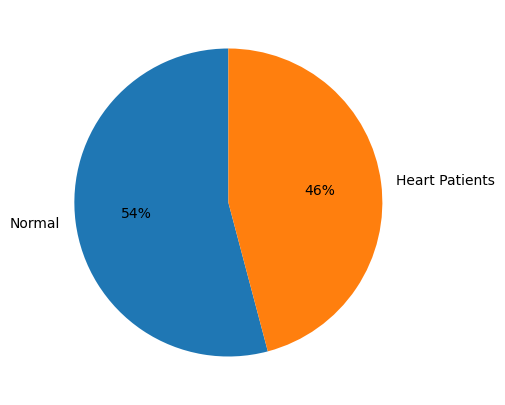

In [8]:
y = df['target'].value_counts() 
labels = ['Normal', 'Heart Patients']
colors = ['#ff9999','#66b3ff']
fig,ax = plt.subplots(figsize=(5,5))
ax.pie(y, labels= labels,autopct = "%1.0f%%", startangle= 90)

## Age Group Most Prone to Have Heart Disease

In [46]:
df['age'].min()

29

In [47]:
df['age'].max()

77

In [55]:
df_age_target = pd.DataFrame(df, columns=['age', 'target'])

In [87]:
conditions= [
    ((df_age_target['age'] >=22) & (df_age_target['age'] <34)),
    ((df_age_target['age'] >=34) & (df_age_target['age'] <=44)),
    ((df_age_target['age'] >=45) & (df_age_target['age'] <=64)),
    (df_age_target['age']>64)    
] 
values =['early adulthood', 'early middle age', 'late middle age', 'senior citizens']
df_age_target['age_category'] = np.select(conditions, values)
df_category_target = pd.DataFrame(df_age_target, columns=['age_category','target'])
df_category_target

,age_category,target
0,late middle age,0
1,senior citizens,1
2,senior citizens,1
3,early middle age,0
4,early middle age,0
...,...,...
298,late middle age,1
299,senior citizens,1
300,late middle age,1
301,late middle age,1


In [93]:
df_category_target['target'].dtype

dtype('int64')

In [98]:
count_heart_patients_by_age['Number of Heart Patients']= df_category_target.groupby('age_category').sum()
count_heart_patients_by_age

,Number of Heart Patients
age_category,
early adulthood,0
early middle age,14
late middle age,105
senior citizens,20


Text(0, 0.5, 'Count of heart patients')

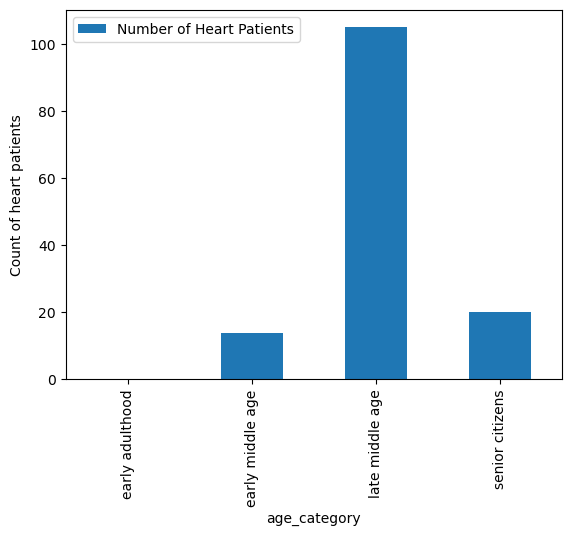

In [124]:
count_heart_patients_by_age.plot(kind= 'bar')
plt.ylabel("Count of heart patients")

## Gender Most Prone to Have Heart Disease

In [108]:
df_gender = pd.DataFrame(df, columns= ['sex', 'target'])
df_gender

,sex,target
0,1,0
1,1,1
2,1,1
3,1,0
4,0,0
...,...,...
298,1,1
299,1,1
300,1,1
301,0,1


In [122]:
df_gender['sex'] = np.where(df_gender['sex']==1, 'male', 'female')

In [123]:
df_gender

,sex,target
0,male,0
1,male,1
2,male,1
3,male,0
4,female,0
...,...,...
298,male,1
299,male,1
300,male,1
301,female,1


Text(0, 0.5, 'Count of heart patients')

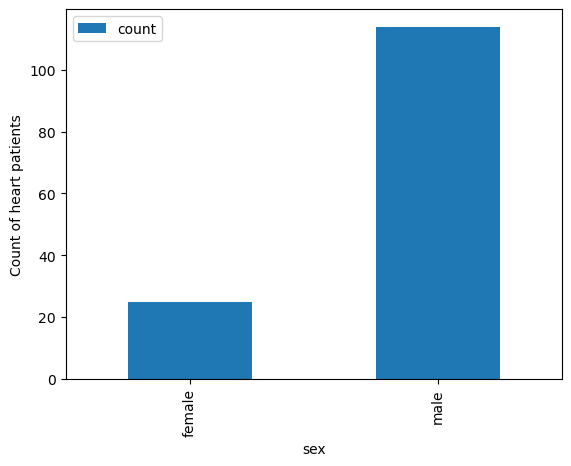

In [133]:
count_heart_patients_by_gender= pd.DataFrame()
count_heart_patients_by_gender['count'] = df_gender.groupby('sex').sum()
count_heart_patients_by_gender.plot(kind='bar')
plt.ylabel("Count of heart patients")

## Chest Pain Analysis

In [129]:
df_cp = pd.DataFrame(df, columns=['cp', 'target'])
df_cp

,cp,target
0,0,0
1,3,1
2,3,1
3,2,0
4,1,0
...,...,...
298,0,1
299,3,1
300,3,1
301,1,1


In [130]:
conditions = [
    df_cp['cp'] == 0,
    df_cp['cp'] == 1,
    df_cp['cp'] == 2,
    df_cp['cp'] == 3
]

replacement_values = ["typical angina", "atypical angina", "non- anginal pain", "asymptomatic"]

df_cp['cp'] = np.where(conditions[0], replacement_values[0],
                        np.where(conditions[1], replacement_values[1],
                                 np.where(conditions[2], replacement_values[2],
                                          np.where(conditions[3], replacement_values[3], df_cp['cp'])
                                         )
                                )
                       )

In [131]:
df_cp

,cp,target
0,typical angina,0
1,asymptomatic,1
2,asymptomatic,1
3,non- anginal pain,0
4,atypical angina,0
...,...,...
298,typical angina,1
299,asymptomatic,1
300,asymptomatic,1
301,atypical angina,1


Text(0.5, 0, 'Chest Pain Type')

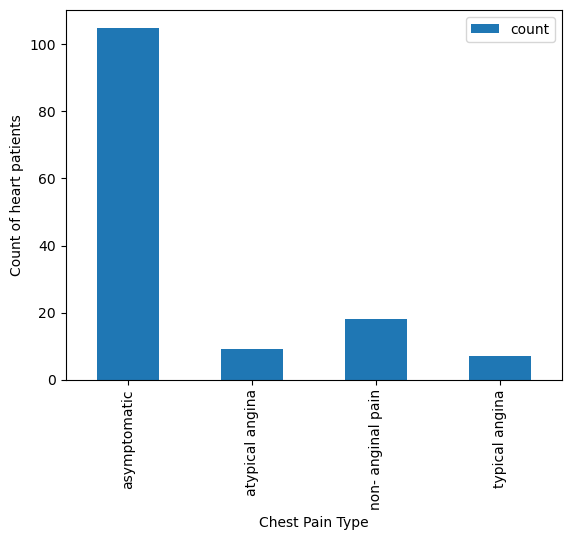

In [134]:
count_heart_patients_by_cp= pd.DataFrame()
count_heart_patients_by_cp['count'] = df_cp.groupby('cp').sum()
count_heart_patients_by_cp.plot(kind='bar')
plt.ylabel("Count of heart patients")
plt.xlabel("Chest Pain Type")